In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import PandasTools

In [2]:
all_docked = pd.read_excel('../Data/Colchicine - AI, MD.xlsx')

In [3]:
all_docked.head()

,Index,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
0,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,23.96,0.61,1.09,0.05,0.74,-7.8
1,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,2.85,0.89,0.54,0.19,0.93,-7.6
2,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,0.70,2.57,0.56,0.81,3.33,-8.4
3,4,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,24.55,3.71,2.77,0.11,4.40,-8.2
4,5,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,180.64,2.47,1.18,0.01,0.98,-8.1


In [4]:
all_docked.rename(columns={'Index': 'ligand number'}, inplace=True)
all_docked.head()

,ligand number,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
0,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,23.96,0.61,1.09,0.05,0.74,-7.8
1,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,2.85,0.89,0.54,0.19,0.93,-7.6
2,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,0.70,2.57,0.56,0.81,3.33,-8.4
3,4,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,24.55,3.71,2.77,0.11,4.40,-8.2
4,5,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,180.64,2.47,1.18,0.01,0.98,-8.1


In [5]:
chirality_selection = pd.read_excel('../Data/new_structures_S_chirality.xlsx')

In [6]:
chirality_selection.head()

,Unnamed: 0,Unnamed: 0.1,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],atom_num,chirality
0,0,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,14,S
1,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,14,S
2,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,14,S
3,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,14,S
4,4,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,7,S


In [7]:
chirality_selection.rename(columns={'Unnamed: 0': 'ligand number'}, inplace=True)
chirality_selection.head()

,ligand number,Unnamed: 0.1,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],atom_num,chirality
0,0,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,14,S
1,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,14,S
2,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,14,S
3,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,14,S
4,4,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,7,S


In [8]:
dock_res = all_docked[all_docked['SMILES'].isin(list(chirality_selection['SMILES']))]

In [9]:
dock_res

,ligand number,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
0,1,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,45.88,10.168579,6.200000,5.700000,136.586050,8.357629,23.96,0.61,1.09,0.05,0.74,-7.8
1,2,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,68.25,10.648944,9.439809,17.460496,49.797629,10.167834,2.85,0.89,0.54,0.19,0.93,-7.6
2,3,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,0.70,2.57,0.56,0.81,3.33,-8.4
3,4,NaN,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,40.43,6.400000,23.752895,8.570105,210.367783,5.400000,24.55,3.71,2.77,0.11,4.40,-8.2
4,5,NaN,O=CC1=CN=NN1[C@H1]2CCC3=CC(OC)=C(OC)C(OC)=C3C4...,41.84,4.774935,11.772850,10.000000,1806.439871,12.029326,180.64,2.47,1.18,0.01,0.98,-8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,NaN,N([C@H1]1CCC2=C(C(OC)=C(OC)C(OC)=C2)C3=CC=C(NC...,50.61,6.900000,7.412152,5.700000,312.933679,9.577028,54.90,1.07,1.30,0.02,0.77,-8.7
333,334,NaN,O=C(C=C(Cl)C=CN([C@H1]1CCC2=C(C(OC)=C(OC)C(OC)...,55.61,2737.493196,698.942058,865.072565,8348.741678,449.451787,9.65,0.26,0.81,0.08,1.56,-9.9
334,335,NaN,CC(C)(C)OC(=O)/N=C(/N[C@H1]1CCC2=C(C(OC)=C(OC)...,77.77,867.467579,698.942058,195.959179,10448.943051,438.651686,53.32,0.81,3.57,0.07,1.59,-7.2
335,336,NaN,CC(C)(C)OC(=O)/N=C(/N[C@H1]1CCC2=C(C(OC)=C(OC)...,74.50,270.370117,832.682412,134.387499,12511.232297,45.510081,93.10,3.08,6.20,0.07,18.30,-8.5


In [10]:
dock_res['Structure'] = [Chem.MolFromSmiles(smi) for smi in dock_res['SMILES']]
PandasTools.SaveXlsxFromFrame(dock_res, '../Data/molecular_docking_chirality.xlsx', molCol='Structure')
#dock_res.to_excel('../Data/molecular_docking_chirality.xlsx')

C:\Users\aleks\AppData\Local\Temp\ipykernel_3456\1886125816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dock_res['Structure'] = [Chem.MolFromSmiles(smi) for smi in dock_res['SMILES']]


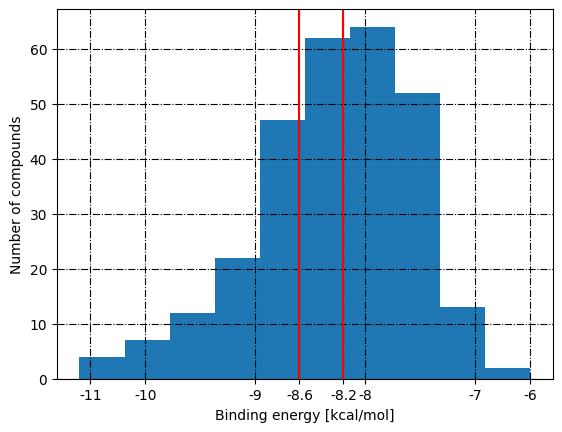

In [12]:
dock_res['Affinity to 1SA0 [kcal/mol]'].hist(bins=10)
#plt.title("Distribution of binarized activity")
#plt.xlim(xmin=-0.5, xmax = 1.5)
x = [-10.5, -10, -9, -8.6, -8.2, -8, -7, -6.5]
labels = [-11, -10, -9, -8.6, -8.2, -8, -7, -6]
plt.xlabel('Binding energy [kcal/mol]')
plt.ylabel('Number of compounds')
plt.axvline(x=-8.6, color='r') #native docked
plt.axvline(x=-8.2, color='r') #colchicine
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.xticks(x, labels)
#plt.savefig('distribution_activity.pdf', bbox_inches='tight')
plt.savefig('chirality_binding_energy.pdf', bbox_inches='tight')

In [13]:
in_range = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] > -8.6]
in_range = in_range[in_range['Affinity to 1SA0 [kcal/mol]'] < -8.2]

In [14]:
the_same_0 = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] == -8.6]
len(the_same_0)

14

In [15]:
the_same_1 = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] == -8.2]
len(the_same_1)

15

In [16]:
len(in_range)

47

In [17]:
in_range

,ligand number,Structure,SMILES,SYBA score,A549 [nM],BALB/3T3 [nM],LoVo [nM],LoVo/DX [nM],MCF-7 [nM],RI LoVo,SI BALB3/T3 (A549),SI BALB3/T3 (LoVo),SI BALB3/T3 (LoVo/DX),SI BALB3/T3 (MCF-7),Affinity to 1SA0 [kcal/mol]
2,3,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,74.22,11.794066,30.305940,54.000000,37.606395,9.099151,0.70,2.57,0.56,0.81,3.33,-8.4
9,10,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,C1N(C(=S)N[C@@H1]2C3=CC(C(NC)=CC=C3C4=C(OC)C(O...,49.88,31.843367,43.405069,8.570105,266.895530,7.928371,31.14,1.36,5.06,0.16,5.47,-8.3
16,17,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,CC(=O)OC1=CC=C2C3=C(C(OC)=C(C=C3CC[C@@H1](C2=C...,34.35,2950.237279,300.516223,865.072565,16001.232435,2110.336219,18.50,0.10,0.35,0.02,0.14,-8.4
25,26,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,CC(=O)N[C@@H1]1C2=CC(C(NC)=CC=C2C3=C(OC)C(OC)=...,25.63,36.646964,525.969581,10.000000,251.644061,57.881645,25.16,14.35,52.60,2.09,9.09,-8.3
28,29,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,COC1=C2C3=CC=C(NC)C(=O)C=C3[C@H1](CCC2=CC(OC)=...,27.84,4.898979,19.364917,1.100000,75.121760,8.098140,68.29,3.95,17.60,0.26,2.39,-8.5
31,32,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,COC1=C(OC)C(OC)=CC=2CC[C@H1](NC(=N)N)C3=CC(=O)...,40.64,4.898979,1800.000000,8.570105,18510.350877,5.600000,2159.87,367.42,210.03,0.10,321.43,-8.3
51,52,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,O=C(O)C=C(C(OCC)=O)N=NN[C@H1]1CCC2=CC(OC)=C(OC...,38.99,4247.645819,969.329665,134.387499,1651.356977,1129.719436,12.29,0.23,7.21,0.59,0.86,-8.5
60,61,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,OC(=O)C=C(C(OCC)=O)N(NCCC)N[C@H1]1CCC2=CC(OC)=...,45.62,885.000000,558.139767,774.596669,745.729792,101.723846,0.96,0.63,0.72,0.75,5.49,-8.5
69,70,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,N1(CCCC1)C(=O)OC2=C(OC)C(OC3)=CC=C2C4=CC=C(SC)...,37.14,243.425553,1128.893263,1015.874008,16116.388818,21.123908,15.86,4.64,1.11,0.07,53.44,-8.5
80,81,<rdkit.Chem.rdchem.Mol object at 0x000001A7902...,O=C(C(C)C)NC(=S)N[C@@H1]1C=2C(C3=C(C(OC)=C(OC)...,92.22,32.186954,6.363961,15.321629,1645.228648,10.474466,107.38,0.20,0.42,0.00,0.61,-8.5


In [18]:
higher_aff = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] < -8.6]
len(higher_aff)

78

In [19]:
lower_aff = dock_res[dock_res['Affinity to 1SA0 [kcal/mol]'] > -8.2]
len(lower_aff)

131